In [18]:
import requests
import credentials
import pandas as pd
import matplotlib.pyplot as plt

# Inputs: Stock Symbol, API Key

In [2]:
SYMBOL = 'XOM'
API_KEY = credentials.FMP_API_KEYS

# Retrieve Historical Dividend Payout Amounts

In [3]:
div = requests.get(f"https://financialmodelingprep.com/api/v3/historical-price-full/stock_dividend/{SYMBOL}?apikey={API_KEY}").json()

In [5]:
div_data = {'Date': [],
           'Dividend': []}

for h in div['historical']:
    if 'dividend' in h:
        print(h['dividend'])
        div_data['Date'].append(h['date'])
        div_data['Dividend'].append(h['dividend'])

0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.82
0.82
0.82
0.82
0.77
0.77
0.77
0.77
0.75
0.75
0.75
0.75
0.73
0.73
0.73
0.73
0.69
0.69
0.69
0.69
0.63
0.63
0.63
0.63
0.57
0.57
0.57
0.57
0.47
0.47
0.47
0.47
0.44
0.44
0.44
0.44
0.42
0.42
0.42
0.42
0.4
0.4
0.4
0.4
0.35
0.35
0.35
0.35
0.32
0.32
0.32
0.32
0.32
0.29
0.29
0.29
0.27
0.27
0.27
0.27
0.25
0.25
0.25
0.25
0.23
0.23
0.23
0.23
0.23
0.23
0.23
0.02
0.44
0.44
0.44
0.44
0.44
0.44
0.44
0.44
0.41
0.41
0.41
0.41
0.41
0.41
0.41
0.41
0.41
0.41
0.79
0.79
0.79
0.79
0.75
0.75
0.75
0.75
0.75
0.75
0.72
0.72
0.72
0.18
0.72
0.18
0.72
0.18
0.72
0.18
0.72
0.18
0.72
0.18
0.72
0.18
0.72
0.18
0.67
0.1675
0.67
0.1675
0.67
0.1675
0.67
0.1675
0.67
0.1675
0.67
0.6
0.6
0.6
0.15
0.15
0.1375
0.1375
0.1375
0.1375
0.1375
0.125
0.125
0.125
0.1125
0.1125
0.1125
0.1125
0.1125
0.1125
0.1125
0.10625
0.10625
0.10625
0.10625
0.10625
0.10625
0.1
0.1
0.1
0.09375
0.09375
0.09375
0.09375
0.09375
0.1875
0.09375
0.09375
0.09375
0.09375
0.09375
0.0875
0.08125
0.075
0.06875

In [6]:
df = pd.DataFrame(div_data)
df.set_index('Date', inplace=True)

In [17]:
df = df[::-1]
df

,Dividend
Date,
1962-02-07,0.01875
1962-05-09,0.01875
1962-08-08,0.01875
1962-11-07,0.02188
1963-02-06,0.02031
...,...
2020-08-12,0.87000
2020-11-10,0.87000
2021-02-09,0.87000


In [8]:
years = {}

for date in df.index:
    year = date.split('-')[0]
    if year in years:
        years[year] += df.loc[date, 'Dividend']
    else:
        years[year] = df.loc[date, 'Dividend']

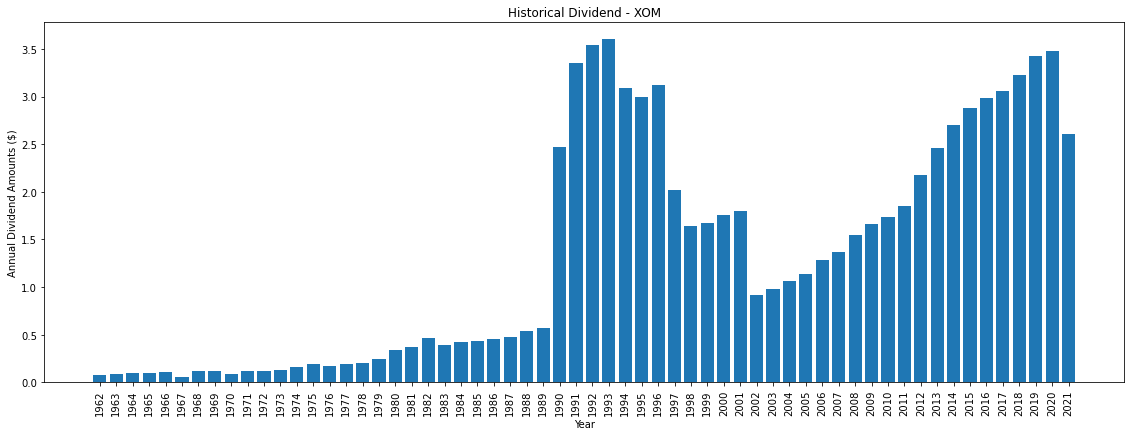

In [9]:
x_value = [i for i in years.keys()]
y_value = [i for i in years.values()]
fig = plt.figure(figsize=(15, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x_value, y_value)
plt.title('Historical Dividend - ' + SYMBOL)
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Annual Dividend Amounts ($)')
plt.show()